313/313 [==============================] - 1s 3ms/step - loss: 0.0245 - acc: 0.9923

Test loss: 0.024460630491375923
Test accuracy: 0.9922999739646912


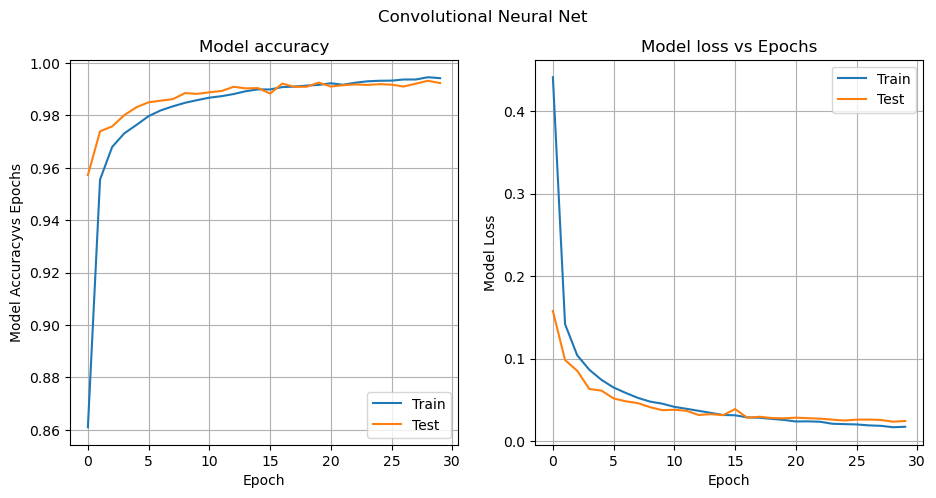

313/313 [==============================] - 1s 3ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Digits Predictions:


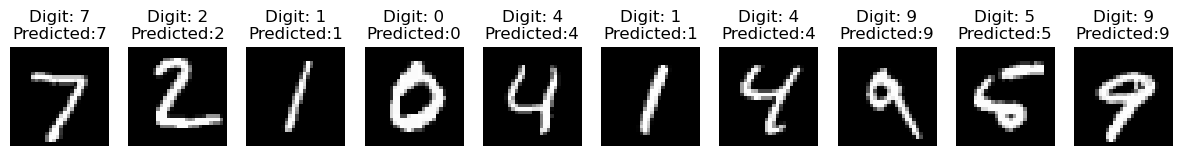

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#torno ad avere 60k immagini 28x28 e 60k label. Facciamo train su 60k e test su 10k
       
# remember to move towards a standard flat layer in the final part of your DNN
#ispirazione: https://adamharley.com/nn_vis/cnn/3d.html
def create_CNN():
    #ora ho immagine 28x28x1
    
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space cioe' 5x5)
    #10 filtri applico la convoluzione con una mat 5x5
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    #qui non volevo dropout perche sono pochi
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(25, kernel_size=(5, 5), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(150, activation='relu'))
    
    model.add(Dense(10, activation='softmax')) 
    #we need a soft-max layer with num_classes=10 possible outputs as output layer
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['acc'])
    return model


# training parameters
batch_size = 32
epochs = 30 #forse 15, dipende da 12.1

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

plt.figure(figsize=(11,5))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Model Accuracyvs Epochs')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss vs Epochs')
plt.ylabel('Model Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.suptitle("Convolutional Neural Net")
plt.show()

predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Digits Predictions:')
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Abbiamo effettuato il training per 30 epoche, in realta' pero' e' poco conveniente: infatti riducendo a 20 le epoche guadagniamo di molto in termini di tempo di calcolo, passando da 15 minuti a solamente 6, non perdiamo quasi nulla in termini di loss e accuracy, come possiamo vedere confrontando i valori trovati con quelli del plot sottostante, e, allo stesso tempo, riuscendo comunque a predire tutte e 10 le cifre!

313/313 [==============================] - 2s 5ms/step - loss: 0.0265 - acc: 0.9918

Test loss: 0.026525845751166344
Test accuracy: 0.9918000102043152


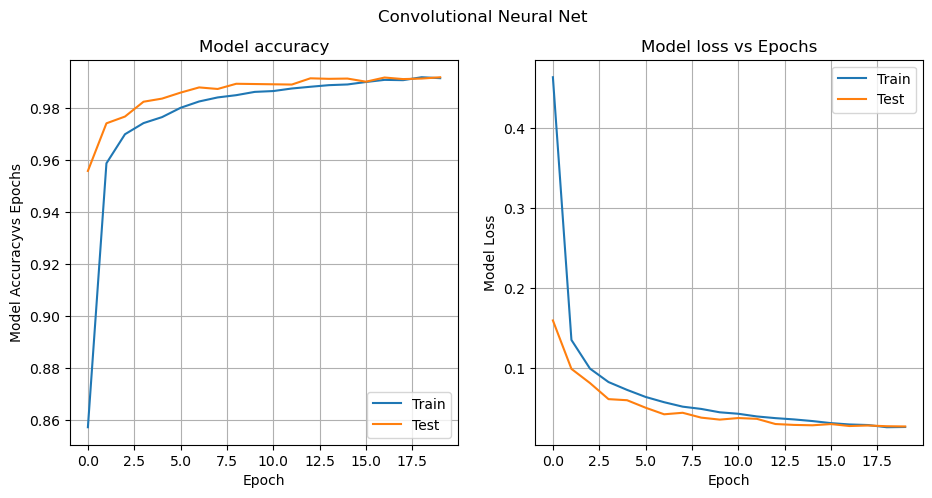

313/313 [==============================] - 2s 4ms/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Digits Predictions:


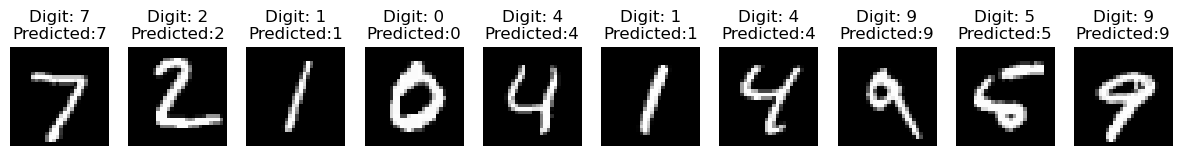

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
# remember to move towards a standard flat layer in the final part of your DNN
#FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... https://adamharley.com/nn_vis/cnn/3d.html
#ispirazione: https://adamharley.com/nn_vis/cnn/3d.html
def create_CNN():
    #ora ho immagine 28x28x1
    
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space cioe' 5x5)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape)) #primi 10 filtri
    #qui non volevo dropout perche sono pochi
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(25, kernel_size=(5, 5), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(150, activation='relu'))
    
    #droout da qualche oarte per impedirgli di overfittare?????? 
    model.add(Dense(10, activation='softmax')) 
    #we need a soft-max layer with num_classes=10 possible outputs as output layer
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['acc'])
    return model


# training parameters
batch_size = 32
epochs = 20 #forse 15, dipende da 12.1

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

plt.figure(figsize=(11,5))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Model Accuracyvs Epochs')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss vs Epochs')
plt.ylabel('Model Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')

plt.suptitle("Convolutional Neural Net")
plt.show()

predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Digits Predictions:')
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()